The main goal is to cluster all the customers according to 
their attributes and gain more information about various customer patterns.

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df = pd.read_excel("F:\iNeuron\online_retail_II.xlsx")

In [3]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
#checking for the dimension of the data
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 525461 rows and 8 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
#Droping null values
data = df.dropna()
data.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [8]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
#Removing duplicates
data.duplicated().sum()

6771

In [10]:
dataset=data.drop_duplicates()

In [11]:
dataset.shape

(410763, 8)

In [12]:
dataset.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [13]:
dataset['InvoiceDate'].head()

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [14]:
##Fetaure Engineering Process
dataset['Dates'] = pd.to_datetime(dataset['InvoiceDate']).dt.date

In [15]:
import datetime
dataset['Date']=pd.to_datetime(dataset['Dates']) 

In [16]:
# dataset['year'] = dataset['Date'].dt.year
dataset.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Dates,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01


In [17]:
new_data = dataset.drop(['InvoiceDate','Dates'],axis = 1)
new_data.head(2)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01


In [18]:
# new_data = new_data.drop(['Invoice'],axis = 1)

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        410763 non-null object
StockCode      410763 non-null object
Description    410763 non-null object
Quantity       410763 non-null int64
Price          410763 non-null float64
Customer ID    410763 non-null float64
Country        410763 non-null object
Date           410763 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [20]:
neumerical_feature=[feature for feature in new_data.columns if new_data[feature].dtypes!='O']
neumerical_feature

['Quantity', 'Price', 'Customer ID', 'Date']

In [21]:
categorical_feature=[feature for feature in new_data.columns if new_data[feature].dtypes=='O']
len(categorical_feature)
categorical_feature

['Invoice', 'StockCode', 'Description', 'Country']

In [22]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,410763.0,12.923735,102.039550,-9360.0,2.00,5.00,12.00,19152.00
Price,410763.0,3.908358,71.714794,0.0,1.25,1.95,3.75,25111.09
Customer ID,410763.0,15353.621857,1681.657665,12346.0,13979.00,15311.00,16797.00,18287.00


Note:Here we have taken ‘Count’ of each invoices for each customer
so that we can get a total number of invoices for each customer.
To find out how many times a Customer has visited the store by the column Invoice.

In [23]:
data1=new_data.copy()
customer_freq = data1.groupby('Customer ID')['Invoice'].count()
customer_freq = customer_freq.reset_index()
customer_freq.head()

,Customer ID,Invoice
0,12346.0,45
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21


created column as total amount according to the unit price and quantity purchased.

In [24]:
data1['Total_amount'] = data1['Quantity']*data1['Price']
data1.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,30.0


 each unique customer will total amount they have spent. 
 
Note:We are take .sum() to add up all the amounts and get a total for each CustomerID.

In [25]:
customer = data1.groupby('Customer ID')['Total_amount'].sum()
customer = customer.reset_index()
customer.head()

,Customer ID,Total_amount
0,12346.0,-51.74
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93


In [26]:
new_customer_dataset = pd.merge(customer,customer_freq,on ='Customer ID')
new_customer_dataset.head()

,Customer ID,Total_amount,Invoice
0,12346.0,-51.74,45
1,12347.0,1323.32,71
2,12348.0,222.16,20
3,12349.0,2646.99,107
4,12351.0,300.93,21


In [27]:
data1.head(2)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0


In [28]:
# getting max date 
invoice_date = max(data1['Date'])
invoice_date

Timestamp('2010-12-09 00:00:00')

In [29]:
data1['Invoice_Date'] = invoice_date - data1['Date']
data1.head(2)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Total_amount,Invoice_Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,83.4,373 days
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0,373 days


groupby each customer and take out the .min() from the Invoice_Date column to get the days when the customer was last seen.

In [30]:
data1['Invoice_Date'] = data1['Invoice_Date'].dt.days
date = data1.groupby('Customer ID')['Invoice_Date'].min()
date= date.reset_index()
date.head()


,Customer ID,Invoice_Date
0,12346.0,66
1,12347.0,2
2,12348.0,73
3,12349.0,42
4,12351.0,10


In [31]:
type(date)

pandas.core.frame.DataFrame

In [32]:
detailed_customer_dataset = pd.merge(new_customer_dataset,date)
detailed_customer_dataset.head(4)


,Customer ID,Total_amount,Invoice,Invoice_Date
0,12346.0,-51.74,45,66
1,12347.0,1323.32,71,2
2,12348.0,222.16,20,73
3,12349.0,2646.99,107,42


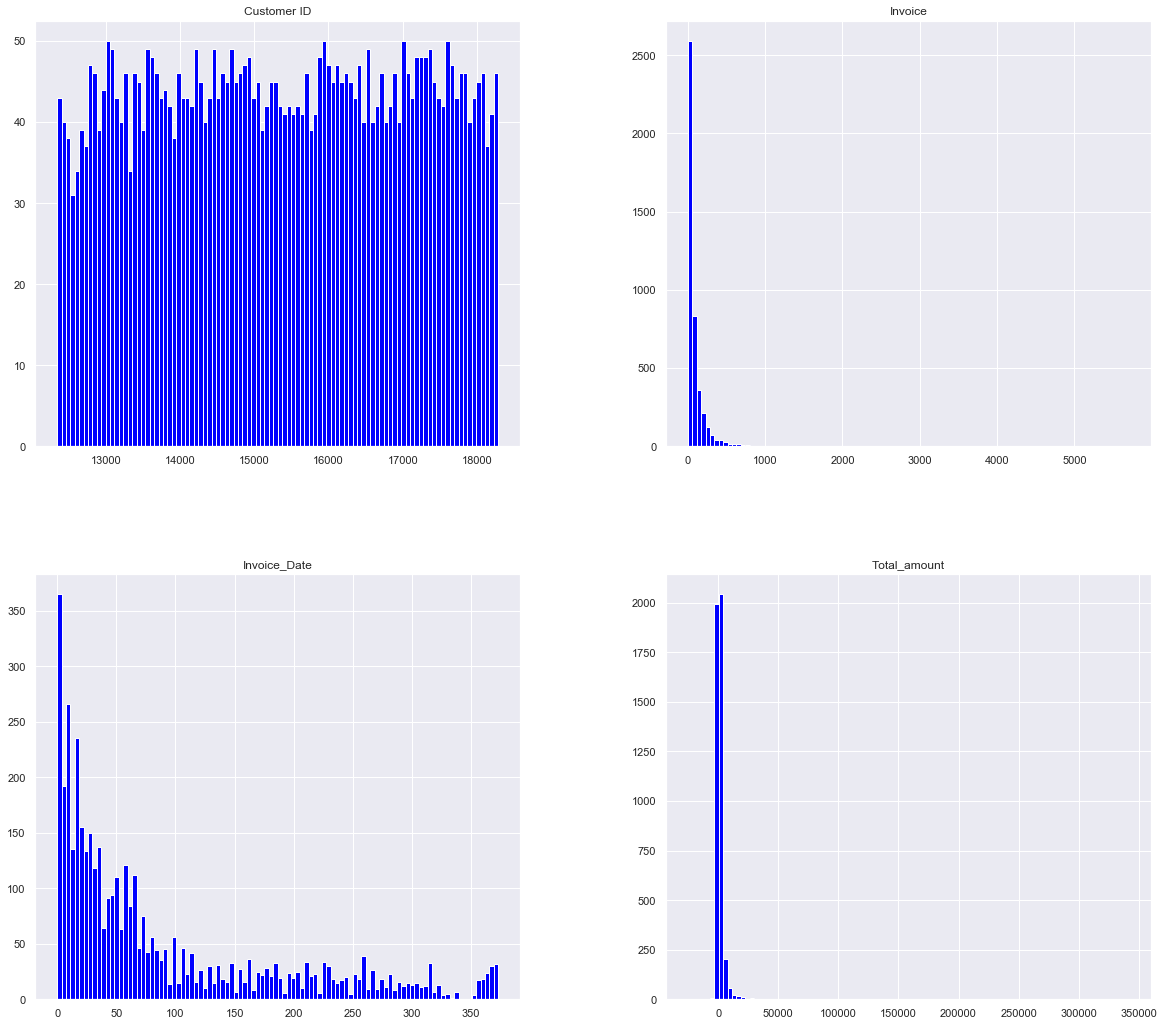

In [33]:
detailed_customer_dataset.hist(bins = 100, figsize = (20, 18), color = 'blue')
plt.show()

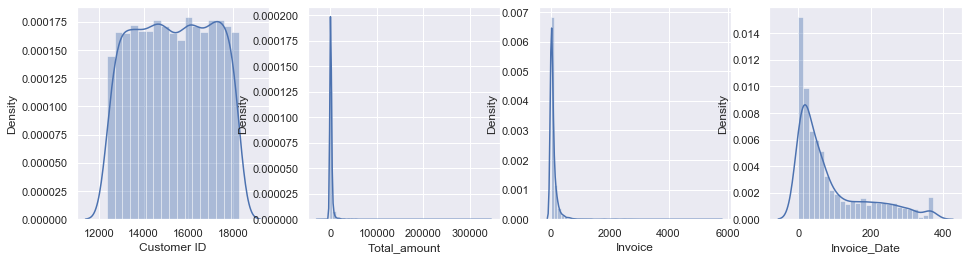

In [34]:
#Density plots
plt.figure(figsize=(20, 18))
col = 1
for i in detailed_customer_dataset.columns:
    plt.subplot(4, 5, col)
    sns.distplot(detailed_customer_dataset[i], color = 'b')
    col += 1 

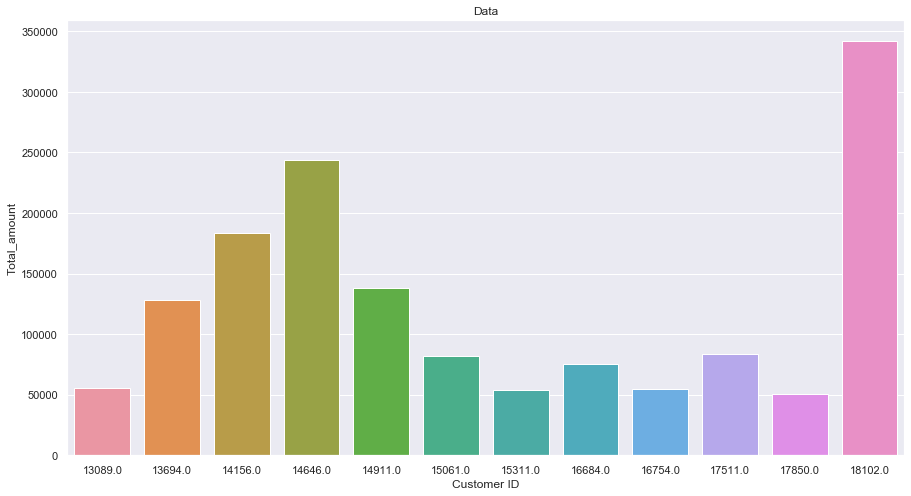

In [35]:
plt.figure(figsize=(15,8))
b1=detailed_customer_dataset.groupby('Customer ID')['Total_amount'].sum().sort_values(ascending = False ).head(12)
b1= b1.reset_index() 
b1.columns = ['Customer ID' ,'Total_amount']
sns.barplot(data= b1 , x= 'Customer ID' , y ='Total_amount');
plt.title("Data");

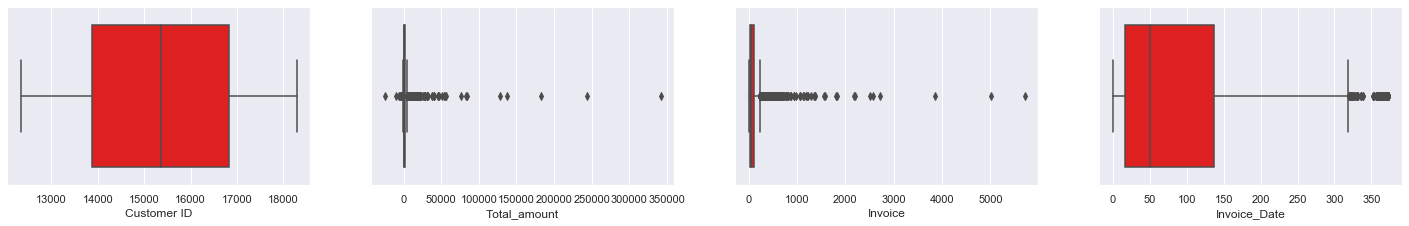

In [36]:
#boxplots for outliers
data = detailed_customer_dataset.copy()
plt.figure(figsize=(25,23))
col = 1
for feature in data:
    plt.subplot(6,4, col)
    sns.boxplot(data[feature],color = 'red')
    col +=1


In [37]:
outlier_data = data[['Total_amount','Invoice','Invoice_Date']].copy()


In [38]:
outlier_data

,Total_amount,Invoice,Invoice_Date
0,-51.74,45,66
1,1323.32,71,2
2,222.16,20,73
3,2646.99,107,42
4,300.93,21,10
5,343.80,18,10
6,317.76,20,43
7,488.21,22,202
8,3560.30,83,15
9,12079.99,165,23


In [39]:
#find the outliers and replace them by median
def find_outliers_IQR(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    outliers = data[((data<(q1-1.5*IQR)) |  (data>(q3+1.5*IQR)))]
    return outliers
    

In [40]:
def impute_outliers_IQR(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR =q3-q1
    upper = data[~(data>(q3+1.5*IQR))].max()
    lower = data[~(data>(q3-1.5*IQR))].min()
    data = np.where(data>upper,data.mean(),np.where(data<lower,data.mean,data))
    return data

In [41]:
for i in outlier_data:
    outlier_data[i] = impute_outliers_IQR(outlier_data[i])
#     print(outlier_data[i])

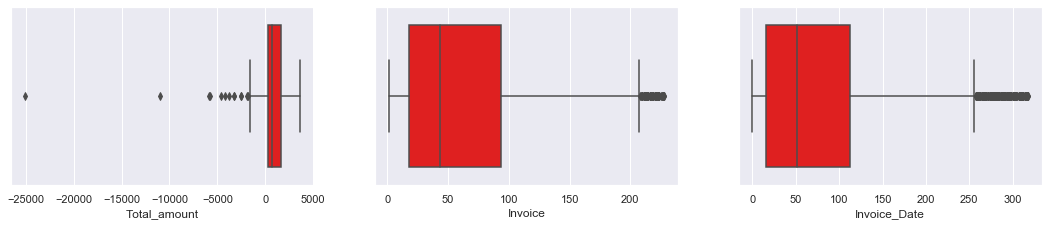

In [42]:
#boxplots after handle outliers

plt.figure(figsize=(25,23))
col = 1
for feature in outlier_data:
    plt.subplot(6,4, col)
    sns.boxplot(outlier_data[feature],color = 'red')
    col +=1

In [43]:
final_data = pd.merge(outlier_data,data)

In [44]:
final_data

,Total_amount,Invoice,Invoice_Date,Customer ID
0,-51.74,45,66,12346.0
1,1323.32,71,2,12347.0
2,222.16,20,73,12348.0
3,2646.99,107,42,12349.0
4,300.93,21,10,12351.0
5,343.8,18,10,12352.0
6,317.76,20,43,12353.0
7,488.21,22,202,12355.0
8,3560.3,83,15,12356.0
9,2719.01,58,10,12358.0


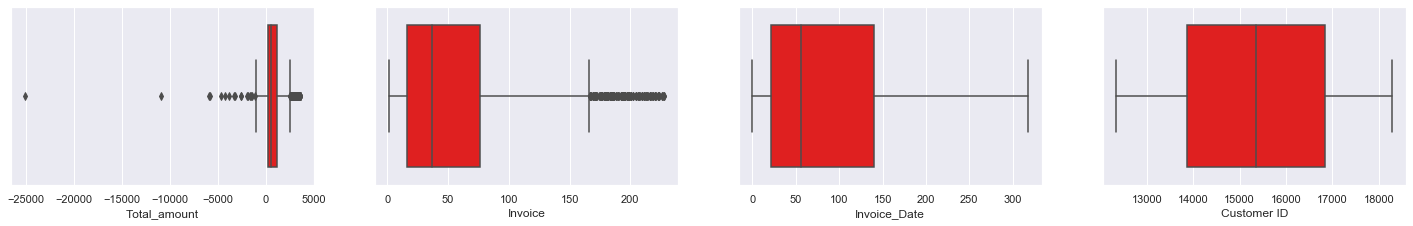

In [45]:
plt.figure(figsize=(25,23))
col = 1
for feature in final_data:
    plt.subplot(6,4, col)
    sns.boxplot(final_data[feature],color = 'red')
    col +=1

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [47]:
scaled = ss.fit_transform(final_data)

In [48]:
scaled.shape

(3647, 4)

In [49]:
scaled_values = pd.DataFrame(scaled)

In [50]:
scaled_values.columns=['Total_amount','Invoice','Invoice_date','Customer_ID']

In [51]:
scaled_values.head()

,Total_amount,Invoice,Invoice_date,Customer_ID
0,-0.900762,-0.168769,-0.267114,-1.768593
1,0.539188,0.355027,-0.999516,-1.768006
2,-0.613936,-0.672418,-0.187007,-1.767418
3,1.925322,1.080282,-0.541764,-1.766830
4,-0.531449,-0.652272,-0.907965,-1.765655


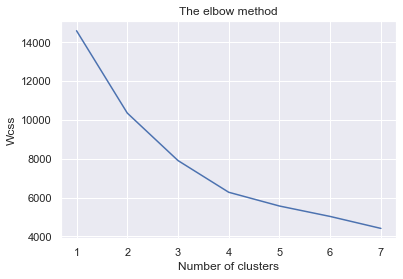

In [65]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_values)
    # inertia_ gives wcss value w.r.t diffrent difrrent k value
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,8),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [63]:
from sklearn.metrics import silhouette_score

for i in range(2,8):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_values)
    cluster_labels = kmeans.labels_
#     print(cluster_labels)
    silhoutte_avg = silhouette_score(scaled_values,cluster_labels)
    print('for cluster{} the silhouette_score is{}'.format(i,silhoutte_avg))
    

for cluster2 the silhouette_score is0.30076717404994796
for cluster3 the silhouette_score is0.3101752823267633
for cluster4 the silhouette_score is0.3136774240698989
for cluster5 the silhouette_score is0.3076775129829221
for cluster6 the silhouette_score is0.3087550137689771
for cluster7 the silhouette_score is0.2969113613238748


From the above elbow graphs and silhouette scores we can take ‘3’ as our k value for number of clusters.

In [54]:
#final_model
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(scaled_values)

KMeans(n_clusters=3)

In [55]:
clusters=kmeans.labels_

In [56]:
final_data['Clusters']=clusters

In [57]:
final_data['Clusters'].unique()

array([0, 1, 2], dtype=int64)

In [58]:
final_data.head()

,Total_amount,Invoice,Invoice_Date,Customer ID,Clusters
0,-51.74,45,66,12346.0,0
1,1323.32,71,2,12347.0,0
2,222.16,20,73,12348.0,0
3,2646.99,107,42,12349.0,1
4,300.93,21,10,12351.0,0


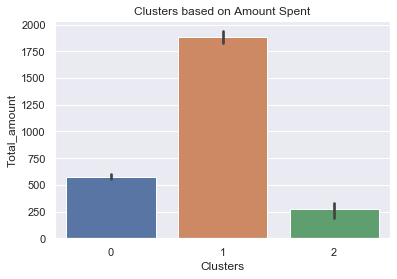

In [59]:
sns.barplot(x='Clusters',y='Total_amount',data=final_data)
plt.title("Clusters based on Amount Spent")
plt.show()

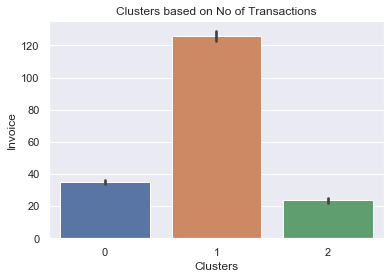

In [60]:
sns.barplot(x='Clusters',y='Invoice',data=final_data)
plt.title("Clusters based on No of Transactions")
plt.show()

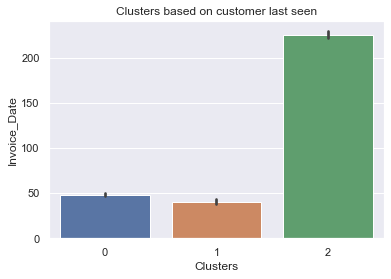

In [61]:
sns.barplot(x='Clusters',y='Invoice_Date',data=final_data)
plt.title("Clusters based on customer last seen")
plt.show()